# Automated breast cnacer detection uing CNN

# Importing libraries

In [2]:
from imutils import paths
import cv2
imagespath = list(paths.list_images("C:\\Users\\91773\\Desktop\\cnn\\archive (2)\\Dataset_BUSI_with_GT"))
import os
import shutil
path="C:\\Users\\91773\\Desktop\\cnn\\archive (2)\\Dataset_BUSI_with_GT"

# Setting path of the folders

In [3]:
original_path_benign = r"C:\Users\91773\Desktop\cnn\archive (2)\Dataset_BUSI_with_GT\benign"
original_path_malignant = r"C:\Users\91773\Desktop\cnn\archive (2)\Dataset_BUSI_with_GT\malignant"
original_path_normal = r"C:\Users\91773\Desktop\cnn\archive (2)\Dataset_BUSI_with_GT\normal"
one_place = r"C:\\Users\\91773\\Desktop\\cnn\\archive (2)\\Dataset_BUSI_with_GT\\one_place"

In [4]:
#for benign pictures
filenames = [f"benign ({i}).png" for i in range(1,437)]
for file in filenames:
    source = os.path.join(original_path_benign, file)
    destination = os.path.join(one_place, file)
    shutil.copy(source, destination)
#for malignant pictures
filenames = [f"malignant ({i}).png" for i in range(1,210)]
for file in filenames:
    source = os.path.join(original_path_malignant, file)
    destination = os.path.join(one_place, file)
    shutil.copy(source, destination)
#for normal pictures
filenames = [f"normal ({i}).png" for i in range(1,133)]
for file in filenames:
    source = os.path.join(original_path_normal, file)
    destination = os.path.join(one_place, file)
    shutil.copy(source, destination)

In [5]:
one_place_list = list(paths.list_images(r"C:\\Users\\91773\\Desktop\\cnn\\archive (2)\\Dataset_BUSI_with_GT\\one_place"))


# Grouping class labels as 0,1,2

In [6]:
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split

image_size = (128, 128)
num_channels = 1 # Change the number of channels to 1 for black and white images

images = []
labels = []

for filename in os.listdir(one_place):
    if filename.endswith('.png'):
        image = Image.open(os.path.join(one_place, filename)).convert('L') # Convert image to grayscale
        image = image.resize(image_size)
        image = np.array(image) / 255.0 # Normalize pixel values
        images.append(image)
    if 'normal' in filename:
        labels.append(0)  # Normal class label
    elif 'benign' in filename:
        labels.append(1)  # Benign class label
    elif 'malignant' in filename:
        labels.append(2)  # Malignant class label


In [7]:
images = np.array(images)
labels = np.array(labels)

In [8]:
images

array([[[0.20392157, 0.43137255, 0.38039216, ..., 0.85490196,
         0.82745098, 0.76862745],
        [0.45098039, 0.25882353, 0.29411765, ..., 0.77647059,
         0.73333333, 0.67058824],
        [0.40392157, 0.34509804, 0.44313725, ..., 0.64313725,
         0.63529412, 0.59607843],
        ...,
        [0.09019608, 0.09803922, 0.09803922, ..., 0.09803922,
         0.07843137, 0.08235294],
        [0.09411765, 0.09803922, 0.09803922, ..., 0.09411765,
         0.09019608, 0.08235294],
        [0.09411765, 0.09411765, 0.09803922, ..., 0.10980392,
         0.10196078, 0.10196078]],

       [[0.42352941, 0.38823529, 0.29803922, ..., 0.8627451 ,
         0.83529412, 0.82745098],
        [0.32941176, 0.36470588, 0.45882353, ..., 0.7254902 ,
         0.70196078, 0.69019608],
        [0.43137255, 0.61568627, 0.51764706, ..., 0.6745098 ,
         0.70588235, 0.70588235],
        ...,
        [0.42745098, 0.45882353, 0.44313725, ..., 0.12156863,
         0.13333333, 0.1254902 ],
        [0.3

In [9]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# dividing testing and training data

In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape input data to include the channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [11]:
# Print the shape of the training and testing sets
print("Training set shape:", train_images.shape)
print("Testing set shape:", test_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing labels shape:", test_labels.shape)

Training set shape: (621, 128, 128, 1)
Testing set shape: (156, 128, 128, 1)
Training labels shape: (621,)
Testing labels shape: (156,)


# Visualizing the data

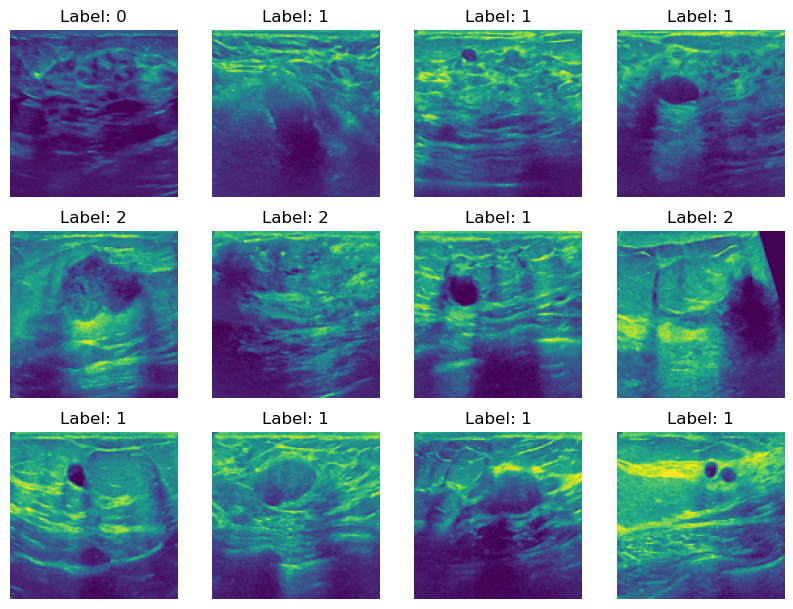

In [12]:
import matplotlib.pyplot as plt

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

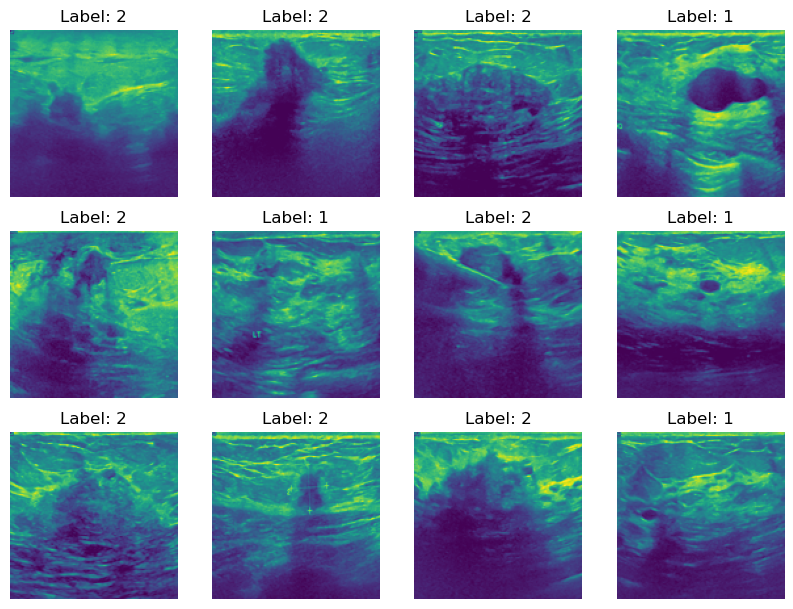

In [13]:
import matplotlib.pyplot as plt

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Label: {test_labels[i]}")
    plt.axis('off')
plt.show()

# visualizing class labels

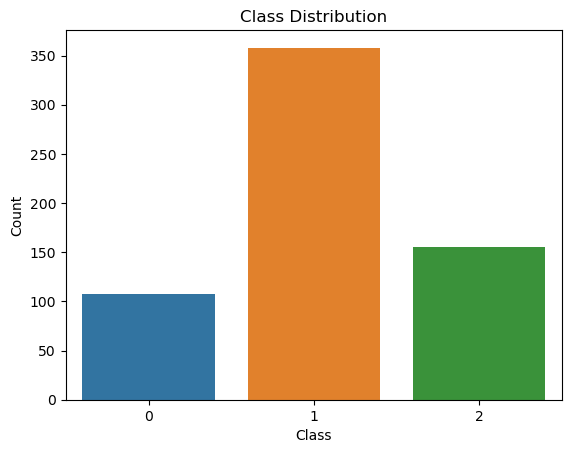

In [14]:
import seaborn as sns

# Count the number of samples in each class
class_counts = np.bincount(train_labels)

# Create a bar plot of class distribution
sns.countplot(x=train_labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# defining the CNN model

In [15]:
import tensorflow as tf
# Create your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Fitting the data in the model

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(test_images, test_labels), callbacks=[early_stopping_callback])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
10/10 [==============================] - 7s 575ms/step - loss: 1.0285 - accuracy: 0.5572 - val_loss: 1.0195 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 6s 557ms/step - loss: 0.9496 - accuracy: 0.5765 - val_loss: 1.0274 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 6s 559ms/step - loss: 0.9247 - accuracy: 0.5781 - val_loss: 1.0144 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 6s 560ms/step - loss: 0.9398 - accuracy: 0.5894 - val_loss: 1.0126 - val_accuracy: 0.5192
Epoch 5/10
10/10 [==============================] - 6s 560ms/step - loss: 0.9238 - accuracy: 0.6023 - val_loss: 1.0015 - val_accuracy: 0.5192
Epoch 6/10
10/10 [==============================] - 6s 558ms/step - loss: 0.8875 - accuracy: 0.6184 - val_loss: 0.9812 - val_accuracy: 0.5705
Epoch 7/10
10/10 [==============================] - 6s 556ms/step - loss: 0.8484 - accuracy: 0.6457 - val_loss: 0.9563 - val_accuracy: 0.5962
Epoch 

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(test_images, test_labels), callbacks=[early_stopping_callback])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
20/20 [==============================] - 7s 295ms/step - loss: 0.7914 - accuracy: 0.6651 - val_loss: 0.8877 - val_accuracy: 0.6218
Epoch 2/10
20/20 [==============================] - 6s 289ms/step - loss: 0.7548 - accuracy: 0.6795 - val_loss: 0.8643 - val_accuracy: 0.6474
Epoch 3/10
20/20 [==============================] - 6s 290ms/step - loss: 0.7649 - accuracy: 0.6570 - val_loss: 0.8576 - val_accuracy: 0.6474
Epoch 4/10
20/20 [==============================] - 6s 292ms/step - loss: 0.7026 - accuracy: 0.6892 - val_loss: 0.7848 - val_accuracy: 0.6538
Epoch 5/10
20/20 [==============================] - 6s 295ms/step - loss: 0.6648 - accuracy: 0.6989 - val_loss: 0.7641 - val_accuracy: 0.7051
Epoch 6/10
20/20 [==============================] - 6s 298ms/step - loss: 0.6447 - accuracy: 0.7118 - val_loss: 0.7672 - val_accuracy: 0.6987
Epoch 7/10
20/20 [==============================] - 6s 293ms/step - loss: 0.5896 - accuracy: 0.7552 - val_loss: 0.7167 - val_accuracy: 0.7115
Epoch 

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(test_images, test_labels), callbacks=[early_stopping_callback])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
20/20 [==============================] - 7s 297ms/step - loss: 0.4218 - accuracy: 0.8084 - val_loss: 0.6364 - val_accuracy: 0.7628
Epoch 2/10
20/20 [==============================] - 6s 292ms/step - loss: 0.3584 - accuracy: 0.8406 - val_loss: 0.6817 - val_accuracy: 0.7821
Epoch 3/10
20/20 [==============================] - 6s 288ms/step - loss: 0.3271 - accuracy: 0.8728 - val_loss: 0.6350 - val_accuracy: 0.7821
Epoch 4/10
20/20 [==============================] - 6s 288ms/step - loss: 0.2709 - accuracy: 0.8937 - val_loss: 0.7765 - val_accuracy: 0.7756
Epoch 5/10
20/20 [==============================] - 6s 287ms/step - loss: 0.2628 - accuracy: 0.9082 - val_loss: 0.5977 - val_accuracy: 0.8141
Epoch 6/10
20/20 [==============================] - 6s 287ms/step - loss: 0.2539 - accuracy: 0.9147 - val_loss: 0.7577 - val_accuracy: 0.7628
Epoch 7/10
20/20 [==============================] - 6s 290ms/step - loss: 0.2232 - accuracy: 0.9114 - val_loss: 0.6903 - val_accuracy: 0.7821
Epoch 

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 5

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(test_images, test_labels), callbacks=[early_stopping_callback])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
20/20 [==============================] - 7s 293ms/step - loss: 0.1251 - accuracy: 0.9533 - val_loss: 0.8623 - val_accuracy: 0.8205
Epoch 2/5
20/20 [==============================] - 6s 281ms/step - loss: 0.1077 - accuracy: 0.9630 - val_loss: 1.4081 - val_accuracy: 0.7885
Epoch 3/5
20/20 [==============================] - 6s 280ms/step - loss: 0.1159 - accuracy: 0.9533 - val_loss: 1.1481 - val_accuracy: 0.8269
Epoch 4/5
5/5 [==============================] - 0s 56ms/step - loss: 0.8623 - accuracy: 0.8205
Test Loss: 0.8623074293136597
Test Accuracy: 0.8205128312110901


In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 5

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(test_images, test_labels), callbacks=[early_stopping_callback])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
20/20 [==============================] - 7s 301ms/step - loss: 0.1470 - accuracy: 0.9485 - val_loss: 0.9298 - val_accuracy: 0.8141
Epoch 2/5
20/20 [==============================] - 6s 291ms/step - loss: 0.0738 - accuracy: 0.9839 - val_loss: 1.4579 - val_accuracy: 0.7756
Epoch 3/5
20/20 [==============================] - 6s 291ms/step - loss: 0.1027 - accuracy: 0.9694 - val_loss: 0.9697 - val_accuracy: 0.8333
Epoch 4/5
5/5 [==============================] - 0s 57ms/step - loss: 0.9298 - accuracy: 0.8141
Test Loss: 0.9297518730163574
Test Accuracy: 0.8141025900840759


# Plotting the training and testing graph

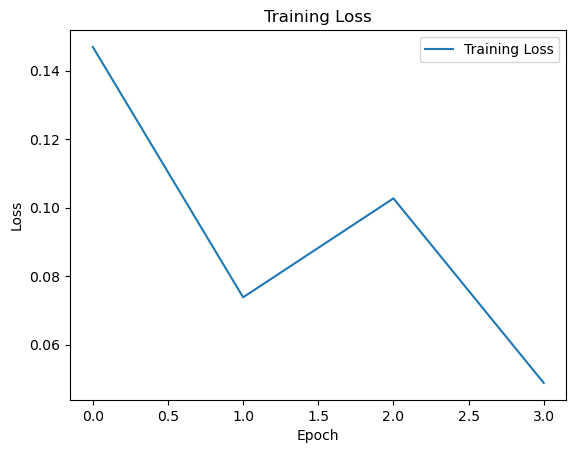

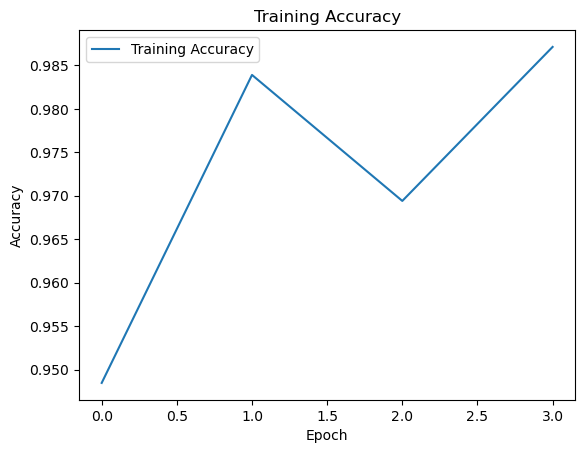

In [31]:
# Plot training and test loss
plt.plot(history.history['loss'], label='Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

# Confusion matrix

5/5 [==============================] - 0s 55ms/step


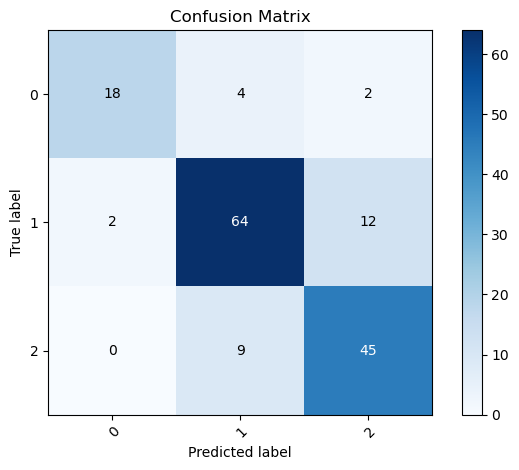

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Assuming you have trained your model and obtained predictions on the test set
# Make predictions on the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Get the unique class labels
class_labels = unique_labels(test_labels, y_pred_classes)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add title and labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels, yticklabels=class_labels,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')

# Add text annotations to each cell
fmt = 'd'
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

# Rotate x-axis labels if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Show the plot
plt.tight_layout()
plt.show()


# Classification report

In [34]:
from sklearn.metrics import classification_report

# Convert class labels to strings
class_labels = [str(label) for label in class_labels]

# Compute classification report
report = classification_report(test_labels, y_pred_classes, target_names=class_labels)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.83      0.82      0.83        78
           2       0.76      0.83      0.80        54

    accuracy                           0.81       156
   macro avg       0.83      0.80      0.81       156
weighted avg       0.82      0.81      0.81       156



In [35]:
# Assuming you have a confusion matrix `cm` and 3 class labels
tn = cm[0, 0]
fp = cm[0, 1] + cm[0, 2]  # Sum of false positives for classes 1 and 2

specificity_class1 = tn / (tn + fp)
print("Specificity for Class 1:", specificity_class1)

tn = cm[1, 1]
fp = cm[1, 0] + cm[1, 2]  # Sum of false positives for classes 0 and 2

specificity_class2 = tn / (tn + fp)
print("Specificity for Class 2:", specificity_class2)

tn = cm[2, 2]
fp = cm[2, 0] + cm[2, 1]  # Sum of false positives for classes 0 and 1

specificity_class3 = tn / (tn + fp)
print("Specificity for Class 3:", specificity_class3)


Specificity for Class 1: 0.75
Specificity for Class 2: 0.8205128205128205
Specificity for Class 3: 0.8333333333333334
